In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx
import matplotlib.colors as colors
import pandas as pd
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.cluster import KMeans
import sklearn.ensemble as ensemble
%matplotlib inline

In [2]:
reviews =pd.read_csv('Reviews.csv')
relevant = reviews[['Score','Summary','Text']]
relevant['Words'] = relevant['Summary'] + ' ' +  relevant['Text']

C:\Users\Catherine\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [3]:
relevant1 = relevant.ix[0:10000].dropna()
vectorizer = CountVectorizer(ngram_range = (1,3), stop_words= 'english', min_df=4)
text = relevant1['Text'].values + ' ' + relevant1['Summary'].values
vectorizer.fit(text)
x = vectorizer.fit_transform(text)
x = x.toarray( )
features = vectorizer.get_feature_names() 
features = np.array(features)

In [7]:
y = relevant1.Score.values

In [13]:
perm = np.random.permutation(len(y))
train = perm[0:5000]
test = perm[5000:]
x_train = x[train]
x_test = x[test]
y_train = y[train]
y_test= y[test]

In [14]:
#initialize random forest
MAX_FEATURES = 'auto'
N_ESTIMATORS = 75
MAX_DEPTH = None 
RF = ensemble.RandomForestClassifier(n_estimators = N_ESTIMATORS, max_features = MAX_FEATURES, max_depth = MAX_DEPTH,
                                     oob_score =True)

In [15]:
RF.fit(x_train,y_train)
RF.score(x_test,y_test)

0.66846630673865226

In [16]:
RF.oob_score_

0.67520000000000002

In [32]:
for i in range(1,6):
    print 'Score for', ' ' + str(i) + ' : ',RF.score(x_test[y_test==i],y_test[y_test==i])

Score for  1 :  0.278825995807
Score for  2 :  0.114093959732
Score for  3 :  0.170022371365
Score for  4 :  0.0896159317212
Score for  5 :  0.992522756827


Note most are 5s 

In [30]:
len(y_test[y_test == 5])/float(len(y_test))

0.6150769846030794

Allowing for tuning

In [58]:
RF = ensemble.RandomForestClassifier(n_estimators = N_ESTIMATORS, max_features = MAX_FEATURES, max_depth = MAX_DEPTH,
                                     oob_score =True, class_weight='balanced')
RF.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [59]:
print RF.score(x_test,y_test)
for i in range(1,6):
    print 'Score for', ' ' + str(i) + ' : ',RF.score(x_test[y_test==i],y_test[y_test==i])

0.665466906619
Score for  1 :  0.283018867925
Score for  2 :  0.0973154362416
Score for  3 :  0.111856823266
Score for  4 :  0.0753911806543
Score for  5 :  0.995123537061


In [37]:
RF.oob_score_

0.66739999999999999

In [60]:
features[RF.feature_importances_.argsort()[-10:][::-1]]

array([u'great', u'good', u'best', u'love', u'ok', u'like', u'worst',
       u'disappointed', u'taste', u'terrible'], 
      dtype='<U32')

In [4]:
def get_sentiment(integer):
    if integer>3.5:
        return 1
    else:
        return 0
relevant['Sentiment'] = map(lambda x: get_sentiment(x),relevant.Score)

C:\Users\Catherine\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [5]:
relevant

,Score,Summary,Text,Words,Sentiment
0,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,Good Quality Dog Food I have bought several of...,1
1,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not as Advertised Product arrived labeled as J...,0
2,4,"""Delight"" says it all",This is a confection that has been around a fe...,"""Delight"" says it all This is a confection tha...",1
3,2,Cough Medicine,If you are looking for the secret ingredient i...,Cough Medicine If you are looking for the secr...,0
4,5,Great taffy,Great taffy at a great price. There was a wid...,Great taffy Great taffy at a great price. The...,1
5,4,Nice Taffy,I got a wild hair for taffy and ordered this f...,Nice Taffy I got a wild hair for taffy and ord...,1
6,5,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,Great! Just as good as the expensive brands! ...,1
7,5,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,"Wonderful, tasty taffy This taffy is so good. ...",1
8,5,Yay Barley,Right now I'm mostly just sprouting this so my...,Yay Barley Right now I'm mostly just sprouting...,1
9,5,Healthy Dog Food,This is a very healthy dog food. Good for thei...,Healthy Dog Food This is a very healthy dog fo...,1


In [8]:
new_y = relevant.Sentiment.values
perm = np.random.permutation(len(y))
train = perm[0:5000]
test = perm[5000:]
x_train = x[train]
x_test = x[test]
y_train = new_y[train]
y_test= new_y[test]

### CATHERINE'S ADD-IN SECTION

Now we'll check out how a few baseline models perform on the training set. The three naive models we'll start with are
* A model that classifies everyone as being healthy
* A model that classifies everyone as having the flue
* A model that classifies people randomly

In [16]:
# FROM LAB 10 SOLUTIONS and Catherine's Midterm 2 solutions

#Function for computing the accuracy a given model on the entire train set, only class 0, and only class 1
score = lambda model, x_test, y_test: pd.Series([model.score(x_test, y_test), 
                                                  model.score(x_test[np.array(y_test==0)], y_test[y_test==0]),
                                                  model.score(x_test[np.array(y_test==1)], y_test[y_test==1])],
                                                  index=['overall accuracy', 'accuracy on class 0', 'accuracy on class 1'])


In [20]:
#A model that labels everything 1
class Pos_model(object):
    def predict(self, x):
        return np.array([1] * len(x))
    def score(self, x, y):
        y_pred = self.predict(x)
        y_err = y - y_pred
        return len(y_err[y_err == 0]) * 1. / len(y_err)
    
#A model that labels everything 0
class Neg_model(object):
    def predict(self, x):
        return np.array([0] * len(x))
    def score(self, x, y):
        y_pred = self.predict(x)
        y_err = y - y_pred
        return len(y_err[y_err == 0]) * 1. / len(y_err)

#A model that randomly labels things
class Random_model(object):
    def predict(self, x):
        return np.random.randint(0, 2, len(x))
    def score(self, x, y):
        y_pred = self.predict(x)
        y_err = y - y_pred
        return len(y_err[y_err == 0]) * 1. / len(y_err)

In [22]:
pos_model = Pos_model()
pos_model_scores = score(pos_model, x_train, y_train)


neg_model = Neg_model()
neg_model_scores = score(neg_model, x_train, y_train)

random_model = Random_model()
random_model_scores = score(random_model, x_train, y_train)

score_df = pd.DataFrame({'pos model': pos_model_scores,
                         'neg model': neg_model_scores,
                         'random model': random_model_scores})
score_df

,neg model,pos model,random model
overall accuracy,0.2382,0.7618,0.493600
accuracy on class 0,1.0000,0.0000,0.481948
accuracy on class 1,0.0000,1.0000,0.486479


Now we'll try a host of different techniques. (Note that SVM is super slow...)

In [11]:
from sklearn.cross_validation import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DecisionTree

In [30]:
# BASED ON LAB 10 SOLUTIONS -- these score dataframes are super useful!

#Logistic regression
unweighted_logistic = LogisticRegression()
unweighted_logistic.fit(x_train, y_train)
unweighted_log_scores = score(unweighted_logistic, x_test, y_test)

#Weighted logistic regression
weighted_logistic = LogisticRegression(class_weight='balanced')
weighted_logistic.fit(x_train, y_train)
weighted_log_scores = score(weighted_logistic, x_test, y_test)

#LDA
lda = LDA()
lda.fit(x_train, y_train)
lda_scores = score(lda, x_test, y_test)

#QDA
qda = QDA()
qda.fit(x_train, y_train)
qda_scores = score(qda, x_test, y_test)

#Decision Tree
tree = DecisionTree(max_depth=6)
tree.fit(x_train, y_train)
tree_scores = score(tree, x_test, y_test)

#Weighted Decision Tree
w_tree = DecisionTree(max_depth=6, class_weight = 'balanced')
w_tree.fit(x_train, y_train)
w_tree_scores = score(w_tree, x_test, y_test)

#Unweighted Random Forest
rf = ensemble.RandomForestClassifier()
rf.fit(x_train, y_train)
rf_scores = score(rf, x_test, y_test)

#Weighted Random Forest
w_rf = ensemble.RandomForestClassifier(class_weight='balanced')
w_rf.fit(x_train, y_train)
w_rf_scores = score(w_rf, x_test, y_test)


In [31]:
#Score Dataframe
score_df = pd.DataFrame({'logistic': unweighted_log_scores,
                         'weighted logistic': weighted_log_scores,
                         'lda': lda_scores,
                         'qda': qda_scores,
                         'tree': tree_scores,
                         'weighted tree': w_tree_scores,
                         'rf': rf_scores,
                         'weighted rf': w_rf_scores})
score_df

,lda,logistic,qda,rf,tree,weighted logistic,weighted rf,weighted tree
overall accuracy,0.749050,0.870026,0.281744,0.830834,0.789042,0.871626,0.827834,0.689862
accuracy on class 0,0.516345,0.642917,0.984074,0.466890,0.207041,0.727578,0.467728,0.758592
accuracy on class 1,0.821954,0.941176,0.061712,0.944853,0.971376,0.916754,0.940651,0.668330


In [25]:
# DEVELOPING THE LOGISTIC MODEL -- LET'S TUNE!

params = np.arange(-7, 7, 1)
accuracies = []
class0_acc = []
class1_acc = []

for c in params:
        
    weighted_logistic = LogisticRegression(class_weight='balanced', C=10.0**-c) # uses L2 regularization (harsher) by default
    # Note that C in sklearn is 1/lambda, where lambda is the regularization parameter
    weighted_logistic.fit(x_train, y_train)
    test_scores = score(weighted_logistic, x_test, y_test)
    
    accuracies.append(test_scores[0])
    class0_acc.append(test_scores[1])
    class1_acc.append(test_scores[2])

best_param = 10.0**params[np.argmax(accuracies)]
best_mean_cv_acc = np.max(accuracies)

The best overall accuracy on the test set 0.875 using a regularization parameter of 1.0


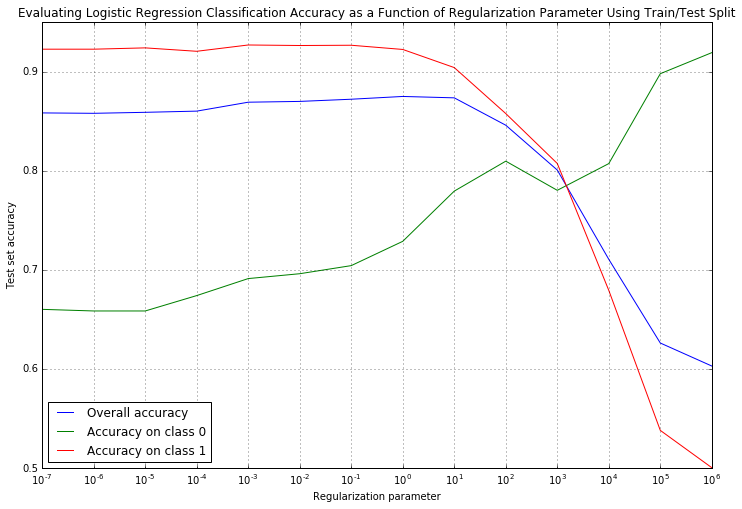

In [26]:
print "The best overall accuracy on the test set", round(best_mean_cv_acc, 4), "using a regularization parameter of", best_param

# Plot our testing and training accuracy as a function of regularization
plt.figure(figsize=(12, 8))
plt.semilogx(10.0**params, accuracies, label = 'Overall accuracy')
plt.semilogx(10.0**params, class0_acc, label = "Accuracy on class 0")
plt.semilogx(10.0**params, class1_acc, label = "Accuracy on class 1")
plt.xlabel('Regularization parameter'); plt.ylabel('Test set accuracy')
plt.title('Evaluating Logistic Regression Classification Accuracy as a Function of Regularization Parameter Using Train/Test Split')
plt.legend(loc='best')
plt.grid()
    

In [28]:
# Check accuracy breakdown in the same method as step 3

#Weighted logistic regression
weighted_logistic = LogisticRegression(class_weight='balanced', C=0.01)
# Note that C in sklearn is 1/lambda, where lambda is the regularization parameter
weighted_logistic.fit(x_train, y_train) 
weighted_log_scores_train = score(weighted_logistic, x_train, y_train)
weighted_log_scores_test = score(weighted_logistic, x_test, y_test)
print "Train set:", weighted_log_scores_train
print "Test set:", weighted_log_scores_test

Train set: overall accuracy       0.887600
accuracy on class 0    0.900777
accuracy on class 1    0.883624
dtype: float64
Test set: overall accuracy       0.846031
accuracy on class 0    0.809796
accuracy on class 1    0.857786
dtype: float64


In [30]:
# From Catherine's HW5 solutions

# Zip the list of coefficients with the list of words to check out some of the most negative/most positive words
words_and_coefs = zip(weighted_logistic.coef_[0].tolist(), vectorizer.get_feature_names())

# Sort this list of tuples by the coefficient
# We want to find the words that contribute the most (or the least) to the log-odds that the sentiment is positive
# http://stackoverflow.com/questions/8459231/sort-tuples-based-on-second-parameter
import operator
words_and_coefs.sort(key = operator.itemgetter(0))

print "Out of the", len(vectorizer.get_feature_names()), "words taken into account, \n"

print "The 10 words that are linked most strongly to a positive sentiment are:"
for tuple in words_and_coefs[-10:]:
    print tuple[1]

print "\n The 10 words that are linked most strongly to a negative sentiment are:"
for tuple in words_and_coefs[:10]:
    print tuple[1]

Out of the 20244 words taken into account, 

The 10 words that are linked most strongly to a positive sentiment are:
favorite
perfect
loves
nice
wonderful
love
excellent
delicious
best
great

 The 10 words that are linked most strongly to a negative sentiment are:
disappointed
bad
ok
thought
okay
disappointing
money
taste
didn
worst


### END CATHERINE'S SECTION

In [18]:
RF = ensemble.RandomForestClassifier(n_estimators = N_ESTIMATORS, max_features = MAX_FEATURES, max_depth = MAX_DEPTH,
                                     oob_score =True, class_weight='balanced')
RF.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [89]:
print RF.score(x_test,y_test)
print RF.score(x_test[y_test==0],y_test[y_test==0])
print RF.score(x_test[y_test==1],y_test[y_test==1])

0.850229954009
0.408658008658
0.982839313573


In [84]:
m_features = np.arange(1,5)
depths = np.arange(1,5)

In [86]:
for i in m_features:
    for j in depths:
        RF = ensemble.RandomForestClassifier(n_estimators = N_ESTIMATORS, max_features = 10**i, max_depth = 10**j,
                                             class_weight='balanced')
        RF.fit(x_train,y_train)
        score = RF.score(x_test,y_test)
        print "Max_Depth: ",10**j," Max_features: ",10**i, " Score: ",score

        

Max_Depth:  10  Max_features:  10  Score:  0.797040591882
Max_Depth:  100  Max_features:  10  Score:  0.817436512697
Max_Depth:  1000  Max_features:  10  Score:  0.799840031994
Max_Depth:  10000  Max_features:  10  Score:  0.80123975205
Max_Depth:  10  Max_features:  100  Score:  0.832633473305
Max_Depth:  100  Max_features:  100  Score:  0.853829234153
Max_Depth:  1000  Max_features:  100  Score:  0.839432113577
Max_Depth:  10000  Max_features:  100  Score:  0.843231353729
Max_Depth:  10  Max_features:  1000  Score:  0.796440711858
Max_Depth:  100  Max_features:  1000  Score:  0.854029194161
Max_Depth:  1000  Max_features:  1000  Score:  0.852629474105
Max_Depth:  10000  Max_features:  1000  Score:  0.852829434113
Max_Depth:  10  Max_features:  10000  Score:  0.732453509298
Max_Depth:  100  Max_features:  10000  Score:  0.833233353329
Max_Depth:  1000  Max_features:  10000  Score:  0.835432913417
Max_Depth:  10000  Max_features:  10000  Score:  0.835632873425


In [90]:
for i in m_features:
    for j in depths:
        RF = ensemble.RandomForestClassifier(n_estimators = N_ESTIMATORS, max_features = 10**i, max_depth = 10**j,
                                             class_weight='balanced')
        RF.fit(x_train,y_train)
        score = RF.score(x_test[y_test==0],y_test[y_test==0])
        print "Max_Depth: ",10**j," Max_features: ",10**i, " Score: ",score

        

Max_Depth:  10  Max_features:  10  Score:  0.48658008658
Max_Depth:  100  Max_features:  10  Score:  0.246753246753
Max_Depth:  1000  Max_features:  10  Score:  0.161038961039
Max_Depth:  10000  Max_features:  10  Score:  0.149783549784
Max_Depth:  10  Max_features:  100  Score:  0.684848484848
Max_Depth:  100  Max_features:  100  Score:  0.458008658009
Max_Depth:  1000  Max_features:  100  Score:  0.351515151515
Max_Depth:  10000  Max_features:  100  Score:  0.351515151515
Max_Depth:  10  Max_features:  1000  Score:  0.788744588745
Max_Depth:  100  Max_features:  1000  Score:  0.644155844156
Max_Depth:  1000  Max_features:  1000  Score:  0.650216450216
Max_Depth:  10000  Max_features:  1000  Score:  0.64329004329


KeyboardInterrupt: 

In [10]:
MAX_DEPTH = 10  
MAX_FEATURES = 1000 
RF = ensemble.RandomForestClassifier(n_estimators = N_ESTIMATORS, max_features = MAX_FEATURES, max_depth = MAX_DEPTH,
                                     oob_score =True, class_weight='balanced')
RF.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features=1000,
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [96]:
print RF.score(x_test,y_test)
print RF.score(x_test[y_test==0],y_test[y_test==0])
print RF.score(x_test[y_test==1],y_test[y_test==1])
print features[RF.feature_importances_.argsort()[-40:][::-1]]

0.783643271346
0.780952380952
0.784451378055
[u'great' u'best' u'bad' u'love' u'delicious' u'disappointed' u'ok'
 u'wonderful' u'excellent' u'thought' u'disappointing' u'perfect' u'didn'
 u'waste' u'smooth' u'weak' u'highly' u'terrible' u'worst' u'favorite'
 u'highly recommend' u'loves' u'yummy' u'okay' u'money' u'waste money'
 u'awful' u'like' u'amazing' u'taste' u'br br' u'did' u'received' u'guess'
 u'great product' u'horrible' u'just' u'nice' u'disappointment' u'thank']


In [97]:
len(y_test[y_test==1])/float(len(y_test))

0.7690461907618477

In [11]:
#Useful Packages
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from scipy.spatial.distance import cosine
from scipy.cluster.vq import vq,kmeans,whiten
import time

tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 3), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(text)
x = tfidf_matrix.toarray()
features = tf.get_feature_names() 
features = np.array(features)


In [ ]:
new_y = relevant.Sentiment.values
perm = np.random.permutation(len(y))
train = perm[0:5000]
test = perm[5000:]
x_train = x[train]
x_test = x[test]
y_train = new_y[train]
y_test= new_y[test]

In [ ]:
MAX_DEPTH = 10  
MAX_FEATURES = 1000 
RF = ensemble.RandomForestClassifier(n_estimators = N_ESTIMATORS, max_features = MAX_FEATURES, max_depth = MAX_DEPTH,
                                     oob_score =True, class_weight='balanced')
RF.fit(x_train,y_train)